In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

data = pd.read_csv("/Users/ambrasina/Downloads/data3.csv")

#data pre-processing
data.fillna(data.mean(), inplace=True)
X = data.drop(columns=['Bankrupt?'])
y = data['Bankrupt?']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the logistic regression model with class_weight='balanced'
model = LogisticRegression(max_iter=1000, class_weight='balanced')

# Train the model on resampled data
model.fit(X_train_resampled, y_train_resampled)

# Predict the target on the test set
y_pred = model.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[1155  158]
 [  14   37]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      1313
           1       0.19      0.73      0.30        51

    accuracy                           0.87      1364
   macro avg       0.59      0.80      0.62      1364
weighted avg       0.96      0.87      0.91      1364



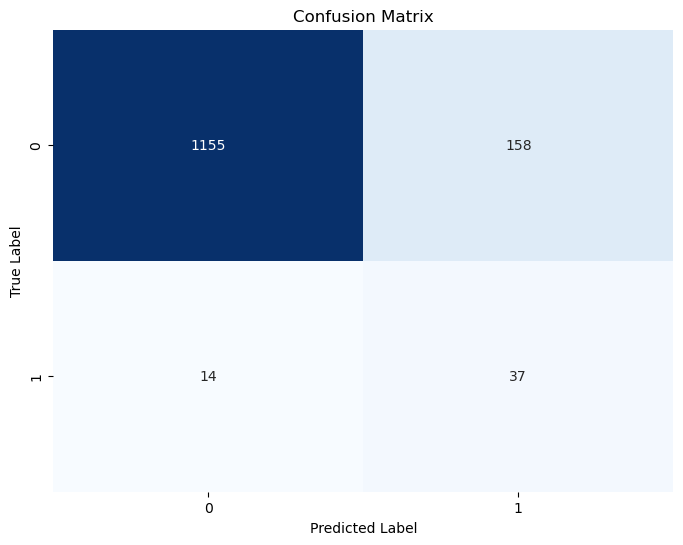

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [4]:
# Without SMOTE
model_without_smote = LogisticRegression(max_iter=1000, class_weight='balanced')
model_without_smote.fit(X_train, y_train)
y_pred_without_smote = model_without_smote.predict(X_test)
print("Without SMOTE")
print(confusion_matrix(y_test, y_pred_without_smote))
print(classification_report(y_test, y_pred_without_smote))

# With SMOTE
model_with_smote = LogisticRegression(max_iter=1000, class_weight='balanced')
model_with_smote.fit(X_train_resampled, y_train_resampled)
y_pred_with_smote = model_with_smote.predict(X_test)
print("With SMOTE")
print(confusion_matrix(y_test, y_pred_with_smote))
print(classification_report(y_test, y_pred_with_smote))


Without SMOTE
[[1148  165]
 [  13   38]]
              precision    recall  f1-score   support

           0       0.99      0.87      0.93      1313
           1       0.19      0.75      0.30        51

    accuracy                           0.87      1364
   macro avg       0.59      0.81      0.61      1364
weighted avg       0.96      0.87      0.90      1364

With SMOTE
[[1155  158]
 [  14   37]]
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      1313
           1       0.19      0.73      0.30        51

    accuracy                           0.87      1364
   macro avg       0.59      0.80      0.62      1364
weighted avg       0.96      0.87      0.91      1364



In [5]:
from sklearn.metrics import roc_auc_score
import numpy as np
# Predict probabilities for the test set
y_prob = model.predict_proba(X_test)[:, 1]


def plot_cumulative_gain(y_test, y_prob):
    n = len(y_test)
    threshold_indices = np.argsort(y_prob)[::-1]
    sorted_y_test = y_test[threshold_indices]

    cumulative_gains = np.cumsum(sorted_y_test) / np.sum(y_test)

    plt.figure(figsize=(8, 6))
    plt.plot(np.arange(n) / n, cumulative_gains, label='Model')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
    plt.title('Cumulative Gains Chart')
    plt.xlabel('Proportion of Data (sorted by predicted probability)')
    plt.ylabel('Cumulative Gain')
    plt.legend()
    plt.show()

# Plot Cumulative Gain Chart
plot_cumulative_gain(y_test, y_prob)


KeyError: '[235, 1007, 144, 104, 1217, 145, 200, 512, 981, 316, 369, 1272, 962, 898, 574, 633, 83, 277, 727, 1290, 370, 406, 976, 557, 3, 808, 176, 621, 22, 1349, 363, 720, 568, 643, 637, 478, 124, 597, 1337, 891, 69, 1164, 1270, 348, 154, 880, 160, 781, 1052, 560, 68, 651, 757, 1093, 639, 105, 1201, 125, 64, 770, 666, 744, 817, 1180, 383, 1269, 656, 299, 507, 653, 388, 184, 1186, 1346, 634, 1138, 134, 110, 827, 856, 1106, 436, 1285, 495, 13, 890, 94, 881, 689, 1240, 785, 1356, 309, 340, 1255, 1105, 269, 205, 1088, 884, 546, 983, 354, 246, 839, 654, 801, 765, 732, 394, 461, 194, 1268, 997, 361, 670, 422, 526, 4, 403, 312, 1203, 1260, 449, 95, 131, 917, 1122, 102, 448, 591, 834, 1274, 47, 278, 1250, 858, 978, 1142, 480, 463, 1248, 25, 268, 143, 281, 1130, 1148, 149, 326, 74, 380, 1361, 178, 112, 645, 336, 721, 500, 197, 1312, 531, 878, 554, 40, 1249, 29, 680, 206, 629, 98, 992, 953, 584, 734, 1094, 708, 920, 146, 1309, 266, 89, 849, 1194, 11, 695, 1067, 1012, 508, 895, 737, 1355, 1307, 267, 353, 668, 1117, 790, 142, 905, 1241, 1246, 1341, 1104, 52, 846, 504, 234, 769, 793, 804, 159, 840, 579, 1053, 187, 946, 877, 223, 987, 1100, 1085, 1230, 1157, 1171, 1143, 1136, 27, 674, 855, 349, 271, 1133, 220, 285, 1124, 1017, 243, 754, 524, 872, 280, 467, 427, 541, 1286, 918, 1189, 632, 869, 886, 226, 1238, 685, 6, 578, 108, 1123, 1014, 519, 165, 1251, 129, 1185, 502, 799, 1233, 1168, 551, 397, 458, 738, 1314, 138, 968, 151, 863, 402, 450, 814, 532, 1050, 148, 575, 276, 796, 562, 1031, 1200, 963, 419, 851, 510, 944, 975, 542, 241, 1350, 1289, 857, 1060, 1257, 1177, 421, 818, 649, 1262, 820, 845, 1347, 1295, 1298, 861, 344, 442, 966, 980, 618, 441, 250, 191, 1243, 481, 1327, 76, 352, 360, 270, 75, 825, 1343, 474, 896, 107, 935, 407, 28, 182, 660, 887, 657, 1063, 636, 328, 313, 908, 1231, 874, 1058, 414, 120, 867, 567, 460, 1303, 1165, 802, 405, 1214, 66, 158, 936, 667, 777, 116, 1333, 913, 411, 572, 147, 1245, 784, 440, 569, 947, 650, 603, 646, 1292, 762, 836, 950, 1256, 1160, 615, 186, 644, 273, 1190, 1043, 77, 1232, 815, 386, 528, 1128, 663, 1301, 71, 304, 1225, 238, 748, 1167, 943, 264, 55, 1102, 1026, 614, 1109, 1202, 341, 204, 49, 610, 669, 466, 1305, 1089, 822, 67, 375, 958, 453, 548, 1095, 973, 792, 58, 345, 327, 1150, 789, 514, 824, 211, 475, 343, 925, 862, 30, 1226, 1170, 488, 995, 952, 1140, 938, 876, 389, 1265, 70, 830, 967, 829, 1111, 115, 934, 236, 1137, 521, 372, 520, 1098, 54, 20, 202, 559, 392, 338, 749, 659, 955, 509, 1252, 555, 1264, 1, 871, 1209, 713, 563, 433, 740, 275, 1296, 1141, 1119, 1316, 209, 462, 193, 1129, 123, 18, 1228, 358, 99, 717, 1069, 117, 1247, 570, 902, 359, 1072, 1145, 1126, 443, 631, 1121, 1077, 331, 760, 1029, 539, 292, 1132, 624, 192, 301, 367, 1028, 1267, 1110, 724, 305, 493, 853, 813, 698, 731, 1134, 772, 48, 1040, 477, 430, 106, 1045, 766, 175, 605, 1258, 937, 43, 807, 1359, 137, 912, 12, 715, 320, 545, 529, 601, 1235, 889, 1280, 1027, 10, 860, 933, 593, 1304, 540, 786, 109, 72, 675, 1306, 595, 665, 150, 387, 60, 664, 1073, 693, 1166, 619, 470, 688, 82, 1234, 456, 606, 141, 423, 999, 1291, 222, 1169, 1277, 161, 843, 174, 1131, 1151, 355, 1083, 587, 39, 945, 1322, 774, 7, 335, 207, 391, 1001, 1216, 628, 718, 1004, 1099, 701, 1030, 1222, 848, 1340, 709, 607, 583, 78, 949, 1313, 1213, 1159, 911, 288, 523, 1278, 1061, 416, 428, 1320, 307, 57, 594, 1294, 62, 1091, 356, 612, 647, 499, 816, 215, 445, 993, 1125, 582, 24, 931, 879, 255, 726, 366, 379, 942, 739, 837, 859, 1336, 1348, 218, 1118, 1344, 979, 1275, 201, 686, 516, 1112, 797, 729, 714, 365, 170, 431, 152, 113, 454, 314, 1035, 1211, 111, 1066, 505, 1279, 1021, 1011, 118, 1254, 909, 894, 203, 232, 929, 1302, 1147, 384, 1023, 745, 1339, 1113, 1266, 1329, 390, 1033, 127, 1065, 1334, 1139, 1338, 455, 602, 985, 294, 459, 598, 901, 53, 396, 1178, 256, 751, 342, 274, 916, 121, 409, 690, 136, 1015, 172, 5, 317, 362, 677, 32, 190, 556, 171, 21, 286, 282, 212, 444, 590, 571, 924, 310, 961, 919, 1070, 735, 1236, 819, 85, 1276, 1051, 1184, 0, 779, 1082, 806, 1054, 558, 1055, 758, 357, 1068, 904, 1019, 1288, 155, 482, 771, 289, 153, 767, 173, 930, 1081, 1008, 775, 1182, 630, 302, 1218, 283, 974, 841, 1204, 163, 494, 573, 1016, 515, 847, 1114, 382, 9, 687, 566, 671, 810, 868, 1229, 189, 330, 694, 1273, 35, 951, 753, 1003, 350, 823, 242, 704, 750, 1358, 214, 446, 986, 1152, 46, 1283, 337, 536, 600, 284, 684, 180, 1127, 415, 484, 564, 623, 711, 761, 225, 260, 791, 417, 1293, 910, 1196, 424, 1271, 1107, 364, 821, 418, 716, 1318, 1135, 854, 722, 1013, 589, 1308, 374, 780, 377, 261, 1156, 903, 300, 140, 272, 1162, 673, 778, 471, 100, 1342, 522, 922, 883, 490, 782, 1076, 984, 1205, 492, 195, 617, 262, 892, 703, 1224, 1253, 1299, 725, 249, 552, 1000, 513, 287, 700, 948, 990, 525, 972, 135, 38, 900, 237, 329, 400, 311, 1206, 298, 873, 1020, 959, 1092, 487, 759, 126, 306, 385, 728, 90, 517, 719, 103, 679, 613, 133, 1282, 678, 661, 1086, 915, 119, 1198, 1360, 835, 489, 875, 483, 166, 1064, 56, 682, 34, 1024, 1187, 16, 844, 295, 897, 658, 776, 850, 1207, 86, 803, 251, 1025, 1311, 648, 1036, 1116, 596, 609, 42, 773, 1172, 1331, 899, 130, 1210, 224, 768, 638, 1284, 399, 413, 697, 2, 741, 81, 580, 914, 1071, 1310, 1048, 988, 795, 608, 989, 398, 1155, 1363, 788, 550, 1154, 826, 581, 906, 293, 971, 229, 928, 464, 998, 939, 404, 452, 707, 1353, 412, 219, 1300, 213, 1208, 139, 941, 162, 956, 1325, 702, 537, 885, 1237, 497, 1239, 1332, 1324, 1006, 870, 114, 451, 1179, 183, 954, 1080, 498, 991, 244, 627, 253, 395, 164, 888, 923, 485, 692, 1319, 1120, 1037, 831, 368, 588, 1096, 92, 866, 723, 662, 1220, 1326, 1227, 1062, 97, 635, 1351, 36, 882, 1191, 1259, 699, 1041, 616, 1059, 258, 1146, 128, 832] not in index'

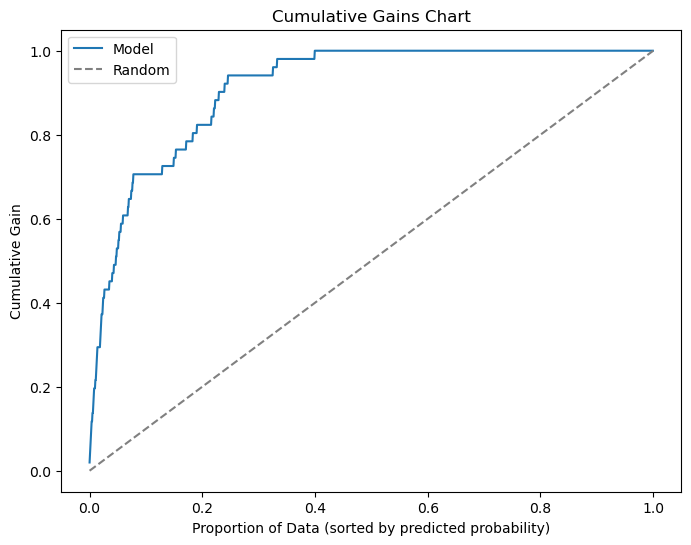

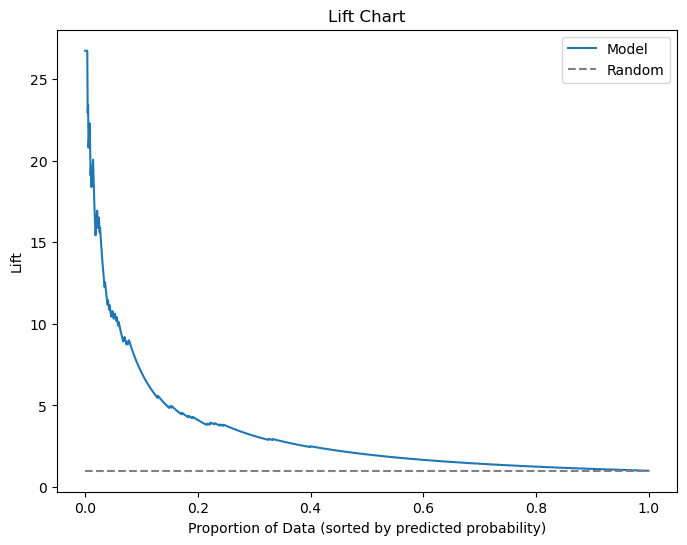

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data = pd.read_csv("/Users/ambrasina/Downloads/data3.csv")

# Data Cleaning
data.fillna(data.mean(), inplace=True)

# Define the features (X) and the target (y)
X = data.drop(columns=['Bankrupt?'])
y = data['Bankrupt?']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the logistic regression model with class_weight='balanced'
model = LogisticRegression(max_iter=1000, class_weight='balanced')

# Train the model on resampled data
model.fit(X_train_resampled, y_train_resampled)

# Predict probabilities for the test set
y_prob = model.predict_proba(X_test)[:, 1]

# Function to plot Cumulative Gains and Lift Charts
def plot_cumulative_gain_and_lift(y_true, y_prob):
    n = len(y_true)
    threshold_indices = np.argsort(y_prob)[::-1]
    sorted_y_true = y_true[threshold_indices]
    
    # Cumulative Gains
    cumulative_gains = np.cumsum(sorted_y_true) / np.sum(y_true)
    
    # Lift Chart
    lift = cumulative_gains / (np.arange(1, n+1) / n)
    
    # Plot Cumulative Gains Chart
    plt.figure(figsize=(8, 6))
    plt.plot(np.arange(n) / n, cumulative_gains, label='Model')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
    plt.title('Cumulative Gains Chart')
    plt.xlabel('Proportion of Data (sorted by predicted probability)')
    plt.ylabel('Cumulative Gain')
    plt.legend()
    plt.show()
    
    # Plot Lift Chart
    plt.figure(figsize=(8, 6))
    plt.plot(np.arange(n) / n, lift, label='Model')
    plt.plot([0, 1], [1, 1], linestyle='--', color='gray', label='Random')
    plt.title('Lift Chart')
    plt.xlabel('Proportion of Data (sorted by predicted probability)')
    plt.ylabel('Lift')
    plt.legend()
    plt.show()

# Plot the Cumulative Gains and Lift Charts
plot_cumulative_gain_and_lift(y_test.to_numpy(), y_prob)
